# D&D Statistic Routines

In [1]:
from itertools import product, combinations, combinations_with_replacement, permutations, zip_longest
from functools import reduce
from statistics import mean
import collections
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import doctest
#import scipy

In [2]:
d4 = list(range(1,5))
d6 = list(range(1,7))
d8 = list(range(1,9))
d10 = list(range(1,11))
d12 = list(range(1,13))
d20 = list(range(1,21))
d100 = list(range(1,101))

In [3]:
# thinking through average roll values
twodie = list(product(d4,repeat=2))
twodie_totals = [sum(pair) for pair in twodie]
print("{}\n{}".format(twodie, twodie_totals))
print(mean(twodie_totals))

# All in one statement:
mean([sum(pair) for pair in product(d4, repeat=2)])

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
[2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8]
5


5

# Monster AC distribution by PC level

In [4]:
# Read a file with the distribution of monster AC's at any given PC level. 
#    This uses all (or a majority) of the monsters from official D&D
#    sources and assumes that PC's fight monster CRs in the range of 
#    pc_lvl - 5 <= CR <= pc_lvl + 2
ac = (pd.read_csv('monster_ac_distro.csv', header=1)
        .set_index('PC Level')
        .rename_axis('Monster AC', axis='columns')
     )
ac

Monster AC,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25
PC Level,,,,,,,,,,,,,,,,,,,
1,4,2,1,6,6,28,49,98,96,54,58,30,23,13,2,0,0,0,0
2,4,2,2,6,6,29,51,104,107,64,64,36,28,15,3,1,0,0,0
3,4,2,2,7,7,31,51,109,114,76,80,41,35,20,7,3,0,0,0
4,4,2,2,7,7,32,51,112,119,80,86,42,39,20,8,5,1,0,0
5,1,2,1,4,2,7,22,65,81,67,79,40,44,29,7,5,1,0,0
6,0,2,1,3,2,5,14,52,71,57,76,37,43,33,7,5,1,0,0
7,0,0,1,1,1,4,8,32,49,46,63,36,39,32,7,5,1,0,0
8,1,0,1,1,2,5,3,22,30,34,53,30,36,37,11,5,1,0,0
9,1,0,0,1,2,4,1,16,19,24,51,26,44,38,10,4,1,0,0


# Diceroll Odds Major functions

In [5]:
def possible_rolls(die, n=1, adv='normal'):  #adv can be 'advantage', 'disadvantage', or 'normal'
    '''
    possible_rolls
    Returns a list of tuples of all possible rolls of dice given the die type ('die') and number 
    of dice rolled ('n').  Each tuple represents one possible roll of 'n' dice of type 'die'
    
    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n should be >=2 and the resulting list of tuples will have tuples of len=1.
          
    >>> possible_rolls(4, n=2)
    [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
    '''
    if adv.lower().startswith('nor'):
        dice_rolls = list(product(list(range(1,die+1)), repeat=n))
        return dice_rolls
    elif adv.lower().startswith('adv'):
        dice_rolls = list(product(list(range(1,die+1)), repeat=max(n,2)))
        return [(max(rolls),) for rolls in dice_rolls]
    elif adv.lower().startswith('dis'):
        dice_rolls = list(product(list(range(1,die+1)), repeat=max(n,2)))
        return [(min(rolls),) for rolls in dice_rolls]
    else:
        raise ValueError("Invalid argument to possible_rolls: adv={}".format(adv))
        
def roll_odds(die, n=1, adv='normal', reroll_nums=[]):
    '''
    Returns a dictionary with every possible role (in a tuple) as the key and the odds
    of rolling that roll as the value.

    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n will be forced to 2 or n, whichever is higher and the resulting list of 
          tuples will have tuples of len=1.
    reroll_nums = a list of integers which are values which will be rerolled once if rolled.  Does
                  not check to see if these values are valid for "die" type dice.  default=[]

    >>> round(roll_odds(4, n=2)[(3, 2)], 4)
    0.0625
    '''
    return reroll_on_x(possible_rolls(die, n=n, adv=adv), die, x=reroll_nums)

def critical_odds(die, n=1, adv='normal', reroll_nums=[], crit_nums=[20,]):
    '''
    Returns a real number between 0 and 1 which is the odds of rolling a critical
    
    Arguments
    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n will be forced to 2 or n, whichever is higher and the resulting list of 
          tuples will have tuples of len=1.
    reroll_nums = a list of integers which are values which will be rerolled once if rolled.  Does
                  not check to see if these values are valid for "die" type dice.  default=[]
    crit_nums = a list of integers which are values which are considered critical on the die.
                  default=[20,].
    >>> critical_odds(20)
    0.05
    >>> critical_odds(20, crit_nums=[19,20])
    0.1
    >>> critical_odds(20, adv='adv', crit_nums=[19,20])
    0.19
    '''
    if not crit_nums:
        return 0
    odds = roll_odds(die, n=n, adv=adv, reroll_nums=reroll_nums)
    crit_odds = 0
    for crit_num in crit_nums:
        crit_odds += sum([chance for roll, chance in odds.items() if crit_num in roll])
    return crit_odds

def deprecated_possible_totals(die, n=1, adder=0, adv='normal'): #adv can be 'advantage', 'disadvantage', or 'normal'
    '''
    possible_totals
    Returns a list of integers of all possible totals resulting when 'n' dice of type 'die' are rolled and summed.
        
    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adder = integer specifying additional value added to the die total (e.g. the '4' in 3d6+4)
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n should be >=2 and the resulting list of tuples will have tuples of len=1.
          
    >>> deprecated_possible_totals(4, n=2)
    [2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8]
    '''
    return [sum(rolls)+adder for rolls in 
             possible_rolls(die, n=n, adv=adv)]

def total_odds(die, n=1, adder=0, adv='normal', reroll_nums=[]):
    '''
    Returns a dictionary with every possible roll total (adding up the die) as the key
    and the odds of rolling that total as the value.

    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adder = integer specifying additional value added to the die total (e.g. the '4' in 3d6+4)
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n should be >=2 and the resulting list of tuples will have tuples of len=1.
    reroll_nums = a list of integers which are values which will be rerolled once if rolled.  Does
                  not check to see if these values are valid for "die" type dice.  default=[]

    >>> test = total_odds(4)
    >>> test[2]
    0.25
    >>> test = total_odds(2, n=2, reroll_nums=[1])
    >>> for k in sorted(test):
    ...     print("({}: {}) ".format(k, test[k]), end='')
    (2: 0.125) (3: 0.375) (4: 0.5) 

    >>> test[4]
    0.5
    '''
    rdict = roll_odds(die, n=n, adv=adv, reroll_nums=reroll_nums)
    return_odds = {}
    for roll, weight in rdict.items():
        #print("Now at roll: {}".format(roll))
        if (sum(roll)+adder) not in return_odds:
            return_odds[sum(roll)+adder] = 0
        return_odds[sum(roll)+adder] += weight
    return return_odds

def avg_roll(die, n=1, adder=0, adv='normal', reroll_nums=[]):
    '''
    Returns an float representing the average value obtained when 'n' dice of type 'die' are rolled
    and then summed (adding in 'adder').
    
    >>> avg_roll(4)
    2.5
    >>> avg_roll(2, n=2, reroll_nums=[1])
    3.375
    '''
    return sum([total * weight for total, weight in total_odds(die, n=n, adder=adder, adv=adv, reroll_nums=reroll_nums).items()])

def deprecated_avg_roll(die, n=1, adder=0, adv='normal'):  #adv can be 'advantage', 'disadvantage', or 'normal'
    '''
    avg_roll
    Returns an float representing the average value obtained when 'n' dice of type 'die' are rolled
    and then summed (adding in 'adder').
    
    Arguments
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    n = integer specifying how many of the 'die' type dice are rolled.
    adder = integer specifying additional value added to the die total (e.g. the '4' in 3d6+4)
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.  If 'advantage' or 'disadvantage'
          are specified, n should be >=2 and the resulting list of tuples will have tuples of len=1.
    >>> deprecated_avg_roll(4, n=2)
    5
    '''
    return mean(deprecated_possible_totals(die, n=n, adder=adder, adv=adv))

def proficiency(pc_lvl):
    prof_bonus = ([2]*4)+([3]*4)+([4]*4)+([5]*4)+([6]*4)
    return prof_bonus[pc_lvl-1]

def total_atk_mod(pc_lvl=3, abil_mod=1, other_atk_mod=0, proficient=True):
    if proficient:
        return proficiency(pc_lvl) + abil_mod + other_atk_mod
    else:
        return abil_mod + other_atk_mod

def total_dmg_mod(abil_mod=1, other_dmg_mod=0):
    return abil_mod + other_dmg_mod

def chance_to_hit(mod=3, pc_lvl=5, ac_weights=None, adv='normal', reroll_nums=[], 
                  crit_hit_nums=[20,], crit_fail_nums=[1,], ac=None, abil_mod=None, 
                  other_atk_mod=0, proficient=True):  #adv can be 'advantage', 'disadvantage', or 'normal'
    '''
    Chance to hit
    Returns the percentage odds that a player will hit with an attack roll,
    given the parameters around that attack roll.
    
    Arguments:
    mod = integer representing the attack modifier (includes proficiency, ability modifier, 
          any +1 bonuses, etc.).  This is ignored if abil_mod is specified
          Defaults to 3.
    pc_lvl = the player character's level.  This level will determine which distribution 
             of likely monster AC's will be used in calculating the odds of hitting.
             Defaults to 5.  If both 'mod' and 'ac' are specified, pc_lvl won't be used.
    ac_weights = optional dictionary of weights with key=AC and value=% odds of fighting a monster
                 with that AC.  If not provided, will use the % distribution of monsters likely
                 to be encountered given the pc_lvl.
                 Default = None (will use ac_weights appropriate to pc_lvl)
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.
    ac = optional int specifying the AC of the single monster you want to calculate the probability
         of hitting.  If specified, it calculates only against this single AC, not a distribution of
         probably ACs.  Note that this could be used as a DC as well (for calculating chance to make
         a Wisdom saving throw at a 13 Save DC, for example)
         Default = None (do not use single AC, use ac_weights)
    reroll_nums = a list of integers which are values which will be rerolled once if rolled.  Does
                  not check to see if these values are valid for "die" type dice.  default=[]
    crit_hit_nums = a list of integers which are values which are considered critical hits on the die.
                  default=[20,]. Crit hit rolls are considered hits no matter what the ac of the foe is
    crit_fail_nums = a list of integers which are values which are considered critical fails on the die.
                  default=[20,]. Crit fail rolls are considered misses no matter what the ac of the foe is
    abil_mod = integer representing ability modifier (i.e. strength modifier or dexterity modifier).  By
               default, this is None.  If it is supplied, then 'mod' will be ignored and the function
               will instead calculate the total modifier by using the proficiency bonus at pc_lvl
               plus the abil_mod plus other_atk_mod
    other_atk_mod = other attack modifier bonus, such as a modifier granted for a +1 sword, or the +2 attack
                modifier on ranged attacks given by the 'Archery' fighting style in the fighter class.

    >>> round(chance_to_hit(mod=0, ac=10, adv='normal', reroll_nums=[]), 4)
    0.55
    >>> round(chance_to_hit(mod=0, ac=10, adv='advantage', reroll_nums=[]), 4)
    0.7975
    >>> chance_to_hit(mod=0, ac_weights={1:.2, 5:.2, 10:.2, 15:.2, 20:.2}, adv='normal', reroll_nums=[], crit_fail_nums=[])
    0.54
    >>> round(chance_to_hit(mod=0, ac_weights={1:.2, 5:.2, 10:.2, 15:.2, 20:.2}, adv='normal', reroll_nums=[1], crit_fail_nums=[]), 4)
    0.557
    >>> round(chance_to_hit(mod=0, ac_weights={1:.2, 5:.2, 10:.2, 15:.2, 22:.2}, adv='normal', reroll_nums=[], crit_hit_nums=[20,], crit_fail_nums=[]), 4)
    0.54
    >>> round(chance_to_hit(mod=0, ac_weights={1:0.5, 22:0.5}, adv='normal', reroll_nums=[], crit_hit_nums=[], crit_fail_nums=[]), 4)
    0.5
    >>> round(chance_to_hit(mod=0, ac_weights={1:0.5, 22:0.5}, adv='normal', reroll_nums=[], crit_hit_nums=[], crit_fail_nums=[1,]), 4)
    0.475
    >>> round(chance_to_hit(mod=0, ac_weights={1:0.5, 22:0.5}, adv='normal', reroll_nums=[], crit_hit_nums=[20,], crit_fail_nums=[]), 4)
    0.525
    >>> round(chance_to_hit(mod=0, ac_weights={1:0.5, 22:0.5}, adv='normal', reroll_nums=[], crit_hit_nums=[20,], crit_fail_nums=[1,]), 4)
    0.5
    >>> round(chance_to_hit(mod=0, ac_weights={1:0.5, 22:0.5}, adv='normal', reroll_nums=[], crit_hit_nums=[19,20], crit_fail_nums=[]), 4)
    0.55
    '''
    if abil_mod:
        mod = total_atk_mod(pc_lvl=pc_lvl, abil_mod=abil_mod, other_atk_mod=other_atk_mod, proficient=proficient)
    if ac:  #simple case, just calc against one AC
        return sum([weight if roll_total>=ac else 0 for roll_total, weight in total_odds(20, adder=mod, adv=adv, reroll_nums=reroll_nums).items()])
        #hits = [1 if roll>=ac else 0 for roll in deprecated_possible_totals(20, n=1, adder=mod, adv=adv)]
        #return sum(hits)/len(hits)
    if not ac_weights:
        monster_count_by_ac_by_pclevel = {1: [  4,   2,   1,   6,   6,  28,  49,  98,  96,  54,  58,  30,  23, 13,   2,   0,   0,   0,   0],
                     2: [  4,   2,   2,   6,   6,  29,  51, 104, 107,  64,  64,  36,  28, 15,   3,   1,   0,   0,   0],
                     3: [  4,   2,   2,   7,   7,  31,  51, 109, 114,  76,  80,  41,  35, 20,   7,   3,   0,   0,   0],
                     4: [  4,   2,   2,   7,   7,  32,  51, 112, 119,  80,  86,  42,  39, 20,   8,   5,   1,   0,   0],
                     5: [  1,   2,   1,   4,   2,   7,  22,  65,  81,  67,  79,  40,  44, 29,   7,   5,   1,   0,   0],
                     6: [  0,   2,   1,   3,   2,   5,  14,  52,  71,  57,  76,  37,  43, 33,   7,   5,   1,   0,   0],
                     7: [  0,   0,   1,   1,   1,   4,   8,  32,  49,  46,  63,  36,  39, 32,   7,   5,   1,   0,   0],
                     8: [  1,   0,   1,   1,   2,   5,   3,  22,  30,  34,  53,  30,  36, 37,  11,   5,   1,   0,   0],
                     9: [  1,   0,   0,   1,   2,   4,   1,  16,  19,  24,  51,  26,  44, 38,  10,   4,   1,   0,   0],
                     10:[  1,   0,   0,   0,   2,   2,   1,  11,  12,  12,  39,  24,  39, 36,   7,   3,   2,   0,   0],
                     11:[  1,   0,   1,   0,   2,   1,   1,   8,   7,   8,  35,  30,  36, 44,   8,   2,   1,   0,   0],
                     12:[  1,   0,   1,   0,   2,   2,   1,   6,   4,   7,  22,  28,  29, 37,  11,   2,   2,   0,   0],
                     13:[  1,   0,   1,   0,   2,   2,   0,   3,   1,   4,  17,  24,  29, 36,  14,   2,   2,   0,   0],
                     14:[  1,   0,   1,   0,   2,   2,   0,   1,   0,   1,  13,  19,  25, 32,  16,   6,   2,   0,   0],
                     15:[  0,   0,   1,   0,   1,   1,   0,   1,   0,   0,  10,  16,  19, 26,  19,   8,   2,   0,   0],
                     16:[  0,   0,   1,   0,   1,   1,   0,   1,   0,   0,   7,  14,   6, 24,  20,   9,   3,   1,   0],
                     17:[  0,   0,   1,   0,   0,   1,   0,   1,   0,   0,   3,  11,   5, 22,  21,   8,   2,   2,   0],
                     18:[  0,   0,   0,   0,   0,   1,   0,   1,   0,   1,   1,   4,   6, 14,  20,  11,   2,   2,   0],
                     19:[  0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   3,   6, 10,  20,  13,   4,   3,   0],
                     20:[  0,   0,   0,   0,   0,   0,   0,   1,   0,   1,   1,   1,   7,  5,  18,  13,   5,   4,   0]} 
        ac_grid = (pd.DataFrame.from_dict(monster_count_by_ac_by_pclevel, orient='index',
                                           columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25])
            .rename_axis('Monster AC', axis='columns')
            .rename_axis('PC Level', axis = 'index')
        )
        acs = pd.to_numeric(ac_grid.columns).to_list()
        weights = [num/sum(ac_grid.loc[pc_lvl,:]) for num in ac_grid.loc[pc_lvl,:]]
        norm_weights = [w/sum(weights) for w in weights]
        ac_weights = {a:nw for a, nw in zip(acs, norm_weights)}
        
        #ac_grid = (pd.read_csv('monster_ac_distro.csv', header=1)
        #    .set_index('PC Level')
        #    .rename_axis('Monster AC', axis='columns')
        #)
        #acs = pd.to_numeric(ac_grid.columns).to_list()
        #weights = [num/sum(ac_grid.loc[pc_lvl,:]) for num in ac_grid.loc[pc_lvl,:]]
        #norm_weights = [w/sum(weights) for w in weights]
        #ac_weights = {a:nw for a, nw in zip(acs, norm_weights)}
    ttl_odds = total_odds(20, adder=mod, adv=adv, reroll_nums=reroll_nums)
    crit_hit_odds = critical_odds(20, adv=adv, reroll_nums=reroll_nums, crit_nums=crit_hit_nums)
    crit_fail_odds = critical_odds(20, adv=adv, reroll_nums=reroll_nums, crit_nums=crit_fail_nums)
    ending_odds = []
    for ac, weight_for_this_ac in ac_weights.items():
        hit_odds_for_this_ac = sum([total_weight if total>=ac else 0 
                                    for total, total_weight in ttl_odds.items()])
        hit_odds_for_this_ac = hit_odds_for_this_ac - crit_fail_odds # crit fails are always a miss
        hit_odds_for_this_ac = max(hit_odds_for_this_ac, crit_hit_odds) # crit hits are always a hit
        ending_odds.append(hit_odds_for_this_ac * weight_for_this_ac)
        #if adv.lower().startswith('nor'):
        #    hits = [1 if roll>=ac else 0 for roll in deprecated_possible_totals(20, n=1, adder=mod, adv=adv)]
        #else:
        #    hits = [1 if roll>=ac else 0 for roll in deprecated_possible_totals(20, n=2, adder=mod, adv=adv)]
        #odds = sum(hits)/len(hits)
        #ending_odds.append(odds*weight)
    return sum(ending_odds)

def probable_damage(mod=3, pc_lvl=5, adv='normal', crit_hit_nums=[20,], crit_fail_nums=[1,],
                    ac=None, dmg_die=6, dmg_n=1, dmg_adder=0, 
                    dmg_reroll_nums=[], abil_mod=None, other_atk_mod=0, other_dmg_mod=0, proficient=True):
    '''
    Probable damage
    Returns the average damage dealt with an attack with given attributes. Note that critical misses always
    miss and that critical hits always hit and will be counted for double the average damage.
    
    Arguments:
    mod = integer representing the attack modifier (includes proficiency, ability modifier, 
          any +1 bonuses, etc.).
          Defaults to 3.
    pc_lvl = the player character's level.  This level will determine which distribution 
             of likely monster AC's will be used in calculating the odds of hitting.
             Defaults to 5.
    adv = string of 'normal', 'advantage', or 'disadvantage'. Specifies whether the attack roll is 
          made normally, with advantage, or with disadvantage.
    crit_hit_nums = a list of integers which are values which are considered critical hits on the die.
                  default=[20,]. Crit hit rolls are considered hits no matter what the ac of the foe is.
                  Also, Critical hits will yield twice the damage of non-critical hits on average and
                  this is reflected in the return value
    crit_fail_nums = a list of integers which are values which are considered critical fails on the die.
                  default=[20,]. Crit fail rolls are considered misses no matter what the ac of the foe is
    ac = optional int specifying the AC of the single monster you want to calculate the probable
         damage for.  If not specified, it calculates probable damage against a distribution of
         probable ACs that a PC of level pc_level is likely to encounter.
         Default = None (do not use single AC, use probable distribution of ACs)
    dmg_die = integer specifying which die type is used for damage roll (e.g. 6 = d6)
    dmg_n = integer specifying how many of the dmg_die are rolled.
    dmg_adder = integer specifying additional damage above the die rolls (e.g. the '4' in 3d6+4)
    abil_mod = integer representing ability modifier (i.e. strength modifier or dexterity modifier).  By
               default, this is None.  
               If it is supplied, then 'mod' and 'dmg_adder' will be ignored and the function
               will instead calculate the following:
                   the attack modifier by using the proficiency bonus at pc_lvl plus the abil_mod plus other_atk_mod
                   the damage modifier by using the abil_mod plus other_dmg_mod
    other_atk_mod = other attack modifier bonus, such as a modifier granted for a +1 sword, or the +2 attack
                modifier on ranged attacks given by the 'Archery' fighting style in the fighter class.
                This is only used if abil_mod is specified.
    other_dmg_mod = other damage modifier bonus, such as a modifier granted for a +1 sword (which grants a +1
                to both attack rolls and damage rolls).
                This is only used if abil_mod is specified.
    Note that the defaults are meant to similate a lvl 5 PC with a +0 ability modifier (this would be a +3 to hit --
    0 from the ability modifier and 3 from proficiency, and a +0 on damage from the ability modifier)
    
    >>> round(probable_damage(mod=0, adv='normal', ac=1, dmg_die=6, dmg_n=1, dmg_reroll_nums=[], crit_hit_nums=[]), 2)
    3.5
    >>> round(probable_damage(mod=0, adv='normal', ac=1, dmg_die=6, dmg_n=1, dmg_reroll_nums=[], crit_hit_nums=[20,]), 2)
    i dont know
    '''
    if abil_mod:
        mod = total_atk_mod(pc_lvl=pc_lvl, abil_mod=abil_mod, other_atk_mod=other_atk_mod, proficient=proficient)
        dmg_adder = total_dmg_mod(abil_mod=abil_mod, other_dmg_mod=other_dmg_mod)
    crit_hit_chance = critical_odds(20, adv=adv, crit_nums=crit_hit_nums)
    noncrit_hit_chance = chance_to_hit(mod=mod, pc_lvl=pc_lvl, ac=ac, adv=adv, crit_hit_nums=crit_hit_nums, crit_fail_nums=crit_fail_nums) \
                            - crit_hit_chance
    total_hit_chance = crit_hit_chance + noncrit_hit_chance
    avg_dmg_roll = avg_roll(dmg_die, n=dmg_n, adder=dmg_adder, reroll_nums=dmg_reroll_nums)
    dmg_roll_without_adders = avg_roll(dmg_die, n=dmg_n, adder=0, reroll_nums=dmg_reroll_nums) # used for crit damage so we don't double the adder
    # now return the weighted average of dmg on noncrit hits and dmg on crit hits
    return ((noncrit_hit_chance * avg_dmg_roll) + (crit_hit_chance * ((dmg_roll_without_adders * 2)+dmg_adder)))
    #return chance_to_hit(mod=mod, pc_lvl=pc_lvl, ac=ac, adv=adv, crit_hit_nums=crit_hit_nums, crit_fail_nums=crit_fail_nums) \
    #      * avg_roll(dmg_die, n=dmg_n, adder=dmg_adder, reroll_nums=dmg_reroll_nums)

def reroll_on_x(roll_list, die, x=[1], debug=False):
    '''Takes in a list of rolls.  Returns a dictionary of possible rolls (the key) and the 
    odds of getting that role (the value).
    
    Arguments:
    roll_list: a list of tuples representing rolls of dice of type 'die'.  Each roll is a tuple.
    die = integer specifying which die type is used for the roll (e.g. 6 = d6)
    x = list of integers representing values which should be re-rolled and replace with all possible
        results of the re-roll.  For example if one of the rolls inside roll_list is (1, 6) and 'x'=[1]
        and 'die'=6, then the (1,6) entry will be replace with (1,6), (2,6), (3,6), (4,6), (5,6), (6,6).
        I.e. the roll is replaced with all possible outcomes of re-rolling the 1.
        
    This recognizes that rolling a d4 and re-rolling 1s results in the following:
    4 = 25% odds
    3 = 25% odds
    2 = 25% odds
    {1,2,3,4} = split the remaining 25% odds based on the re-roll of the 1.
    Adding this up, it is 6.25% odds of a 1, and 31.25% odds of 2, 3, and 4.
    
    The previous way I was doing this, would not result in these odds, but these are the correct odds.
    >>> test = reroll_on_x(possible_rolls(4), 4)
    >>> sum(test.values())
    1.0
    >>> for k in sorted(test):
    ...     print("({}: {}) ".format(k, test[k]), end='')
    ((1,): 0.0625) ((2,): 0.3125) ((3,): 0.3125) ((4,): 0.3125) 
    >>> test[(1,)]
    0.0625
    >>> test[(2,)]
    0.3125
    >>> test[(3,)]
    0.3125
    >>> test[(4,)]
    0.3125
    >>> test = reroll_on_x(possible_rolls(2, n=2), 2, x=[1])
    >>> sum(test.values())
    1.0
    >>> for k in sorted(test):
    ...     print("({}: {}) ".format(k, test[k]), end='')
    ((1, 1): 0.125) ((1, 2): 0.1875) ((2, 1): 0.1875) ((2, 2): 0.5) 
    >>> test[(1,1)]
    0.125
    >>> test[(1,2)]
    0.1875
    >>> test[(2,1)]
    0.1875
    >>> test[(2,2)]
    0.5
    '''
    odds = {roll: 0 for roll in set(roll_list)}
    for roll in set(roll_list):
        odds[roll] = roll_list.count(roll)/len(roll_list)
    original_odds = odds.copy()
    odds_adders = {roll: 0 for roll in roll_list} # all zeros for now, we'll accumulate adds here
    for roll in odds.keys():
        if debug: print("On roll: {}, odds={}, odds_adders={}".format(roll, odds, odds_adders)) #debug
        if sum([1 for r in roll if r in x]) > 0:
            odds[roll] = 0
            if debug: print("    zeroing out {}, odds={}".format(roll, odds))
            for i, die_result in enumerate(roll):
                if die_result in x:
                    split_odds = original_odds[roll] / (sum([list(roll).count(element) for element in x]) * die)
                    if debug: print("    rerolling {}th element ({}), split will be {} ways".format(i, die_result, sum([list(roll).count(element) for element in x]) * die))  #debug
                    new_rolls = possible_rerolls(roll, i, die)
                    for nr in new_rolls:
                        if debug: print("        adding {} to {}".format(split_odds, nr)) #debug
                        odds_adders[nr] += split_odds
    
    return {k: v+odds_adders[k] for k, v in odds.items()}

def possible_rerolls(roll, i, die):
    '''Returns a list of tuples representing all the possible ways to re-roll the 
    ith element of "roll" using a "die" type die'''
    return_rolls = []
    for new_die_result in range(1,die+1):
        new_roll = list(roll).copy()
        new_roll[i] = new_die_result
        return_rolls.append(tuple(new_roll))
    return return_rolls
                                 
            

In [6]:
doctest.testmod()

**********************************************************************
File "__main__", line 345, in __main__.probable_damage
Failed example:
    round(probable_damage(mod=0, adv='normal', ac=1, dmg_die=6, dmg_n=1, dmg_reroll_nums=[], crit_hit_nums=[20,]), 2)
Expected:
    i dont know
Got:
    3.68
**********************************************************************
1 items had failures:
   1 of   2 in __main__.probable_damage
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=40)

### Using the Diceroll functions

In [7]:
print(possible_rolls(4, n=2))
print(avg_roll(20, n=2, adv='advantage'))

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
13.825


In [8]:
pc_level = 6
print('For a {} level PC:'.format(pc_level))
for adv in ['normal', 'advantage', 'disadvantage']:
    for i in range(2,7):
        print("{}: Attack modifier {} = {:0.0%} chance to hit".format(adv, i, chance_to_hit(mod=i, pc_lvl=pc_level, adv=adv)))

round( avg_roll(6, n=2, adder=3), 1)

For a 6 level PC:
normal: Attack modifier 2 = 38% chance to hit
normal: Attack modifier 3 = 43% chance to hit
normal: Attack modifier 4 = 48% chance to hit
normal: Attack modifier 5 = 53% chance to hit
normal: Attack modifier 6 = 58% chance to hit
advantage: Attack modifier 2 = 65% chance to hit
advantage: Attack modifier 3 = 71% chance to hit
advantage: Attack modifier 4 = 76% chance to hit
advantage: Attack modifier 5 = 80% chance to hit
advantage: Attack modifier 6 = 84% chance to hit
disadvantage: Attack modifier 2 = 10% chance to hit
disadvantage: Attack modifier 3 = 15% chance to hit
disadvantage: Attack modifier 4 = 19% chance to hit
disadvantage: Attack modifier 5 = 25% chance to hit
disadvantage: Attack modifier 6 = 31% chance to hit


10.0

In [9]:
print('model different avg damage when some damage results are re-rolled (once)')
pc_level = 6
for rr_list in [[],[1],[1,2],[1,2,3],[1,2,3,4],[1,2,3,4,5],[1,2,3,4,5,6]]:
    print("Level {} PC, +5 to hit, 2d6+3 damage reroll {}= {:0.4} avg damage".format(pc_level,rr_list,probable_damage(mod=5,
                                                pc_lvl=pc_level,
                                                dmg_die=6, 
                                                dmg_n=2, 
                                                dmg_adder=3,
                                                dmg_reroll_nums=rr_list)))

model different avg damage when some damage results are re-rolled (once)
Level 6 PC, +5 to hit, 2d6+3 damage reroll []= 5.612 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1]= 6.052 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1, 2]= 6.252 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1, 2, 3]= 6.26 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1, 2, 3, 4]= 6.124 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1, 2, 3, 4, 5]= 5.892 avg damage
Level 6 PC, +5 to hit, 2d6+3 damage reroll [1, 2, 3, 4, 5, 6]= 5.612 avg damage


In [10]:
for rr_list in [[],[1],[1,2],[1,2,3],[1,2,3,4],[1,2,3,4,5],[1,2,3,4,5,6]]:
    print("Level {} PC, +6 to hit, 1d10+4 damage reroll {}= {:0.4} avg damage".format(pc_level, rr_list,probable_damage(mod=6,
                                                pc_lvl=pc_level,
                                                dmg_die=10, 
                                                dmg_n=1, 
                                                dmg_adder=4,
                                                dmg_reroll_nums=rr_list)))

Level 6 PC, +6 to hit, 1d10+4 damage reroll []= 5.746 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1]= 6.028 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1, 2]= 6.247 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1, 2, 3]= 6.403 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1, 2, 3, 4]= 6.497 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1, 2, 3, 4, 5]= 6.529 avg damage
Level 6 PC, +6 to hit, 1d10+4 damage reroll [1, 2, 3, 4, 5, 6]= 6.497 avg damage


# Roll distribution charts

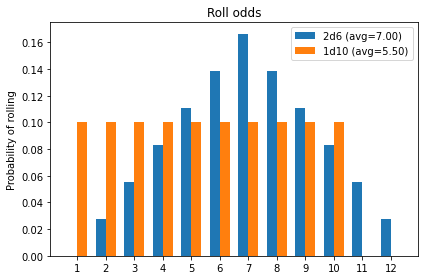

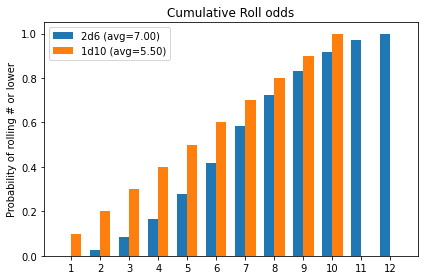

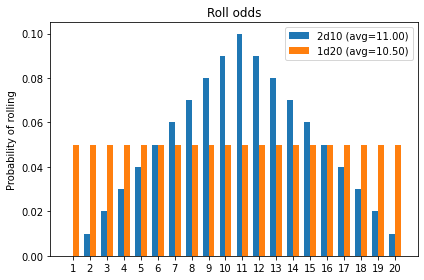

In [11]:
def compare_odds_dist(roll1_odds, roll2_odds, labels=['roll1', 'roll2'], cumulative=False):
    roll_values = set(roll1_odds.keys()) | set(roll2_odds.keys())
    r1_odds = [roll1_odds[k] if k in roll1_odds else 0 for k in roll_values]
    r2_odds = [roll2_odds[k] if k in roll2_odds else 0 for k in roll_values]
    if cumulative:
        r1_odds = [sum(r1_odds[:i+1]) if sum(r1_odds[:i])<0.9999 else 0 for i in range(len(r1_odds))]
        r2_odds = [sum(r2_odds[:i+1]) if sum(r2_odds[:i])<0.9999 else 0 for i in range(len(r2_odds))]

    x = np.arange(len(roll_values))  # the label locations
    width = 0.35  # the width of the bars

    r1_avg = sum([total * weight for total, weight in roll1_odds.items()])
    r2_avg = sum([total * weight for total, weight in roll2_odds.items()])

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, r1_odds, width, label=labels[0]+f" (avg={r1_avg:3.2f})")
    rects2 = ax.bar(x + width/2, r2_odds, width, label=labels[1]+f" (avg={r2_avg:3.2f})")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability of rolling')
    ax.set_title('Roll odds')
    if cumulative:
        ax.set_ylabel('Probability of rolling # or lower')
        ax.set_title('Cumulative Roll odds')
    ax.set_xticks(x)
    ax.set_xticklabels(roll_values)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:0.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    #autolabel(rects1)
    #autolabel(rects2)


    
    fig.tight_layout()
    plt.show()
    
compare_odds_dist(
    total_odds(6, n=2, adder=0, adv='normal', reroll_nums=[]),
    total_odds(10, n=1, adder=0, adv='normal', reroll_nums=[]),
    labels=['2d6', '1d10']
)
compare_odds_dist(
    total_odds(6, n=2, adder=0, adv='normal', reroll_nums=[]),
    total_odds(10, n=1, adder=0, adv='normal', reroll_nums=[]),
    labels=['2d6', '1d10'],
    cumulative=True
)
compare_odds_dist(
    total_odds(10, n=2, adder=0, adv='normal', reroll_nums=[]),
    total_odds(20, n=1, adder=0, adv='normal', reroll_nums=[]),
    labels=['2d10', '1d20']
)

# Chance to hit grid

In [12]:
def chance_to_hit_grid(abil_mods=[0,1,2,3,4,5,6,7], 
                       lvls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                       adv='normal', crit_hit_nums=[20,], crit_fail_nums=[1,], print_table=True):
    '''Creates a grid of chance to hit at different PC levels and core ability (e.g. Strength) modifiers
    The proficiency bonus is calculated based on the PC level.  The chance to hit is based on the 
    AC of the monsters that are likely to be encountered at that PC level
    
    This is calculated by looking at every possible roll total and seeing if it hits against every possible
    AC, and then adjusting using the weighted odds of each roll total and the weighted odds of each AC.
    '''
    df = pd.DataFrame(np.zeros((len(lvls),len(abil_mods))),
                       columns=abil_mods,
                       index=lvls)
    df = df.rename_axis("Ability modifier", axis="columns")
    df = df.rename_axis("PC Level", axis="index")
    pd.set_option("display.float_format", lambda f: f"{f:0.0%}")
    col_width = 6
    num_width = 4
    prec = 0
    if(print_table):
        # print x axis label
        print(f"{'': >{col_width}}{'PC level'}")
        # print column header
        print(f"{'mod': <{col_width}}", end='')
        for lvl in lvls:
            print(f"{lvl: ^{col_width}}", end='')
        print('')
    # print one row for each attack modifier
    for a_mod in abil_mods:
        if(print_table):
            # row label first
            print(f"{a_mod: <{col_width}}", end='')
        for lvl in lvls:
            cth = chance_to_hit(abil_mod=a_mod, pc_lvl=lvl, adv=adv, crit_hit_nums=crit_hit_nums, crit_fail_nums=crit_fail_nums)
            df.loc[lvl,a_mod] = cth
            if(print_table):
                print(f"{cth:{num_width}.{prec}%}{'': <{col_width-num_width}}", end='')
        if(print_table):
            print('')
    return df

norm = chance_to_hit_grid(adv='normal', print_table=True)
norm.to_csv('chance_to_hit_norm.csv')
adv = chance_to_hit_grid(adv='adv', print_table=False)
adv.to_csv('chance_to_hit_adv.csv')
disadv = chance_to_hit_grid(adv='disadv', print_table=False)
disadv.to_csv('chance_to_hit_disadv.csv')
norm

      PC level
mod     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20  
0      50%   49%   48%   48%   44%   43%   41%   39%   37%   36%   35%   34%   32%   31%   29%   27%   26%   23%   21%   20%  
1      50%   49%   48%   48%   49%   48%   46%   44%   47%   46%   45%   44%   47%   46%   44%   42%   46%   43%   41%   40%  
2      55%   54%   53%   53%   54%   53%   51%   49%   52%   51%   50%   49%   52%   50%   49%   47%   51%   48%   46%   45%  
3      60%   59%   58%   58%   59%   58%   56%   54%   57%   56%   55%   54%   57%   55%   53%   52%   55%   53%   51%   50%  
4      64%   64%   63%   63%   64%   63%   61%   59%   62%   61%   60%   59%   62%   60%   58%   57%   60%   58%   56%   55%  
5      69%   69%   68%   67%   69%   67%   66%   64%   67%   66%   64%   64%   67%   65%   63%   62%   65%   63%   61%   60%  
6      74%   74%   73%   72%   74%   72%   71%   69%   72%   70%   69%   68%   71%   70%   68%  

Ability modifier,0,1,2,3,4,5,6,7
PC Level,,,,,,,,
1,50%,50%,55%,60%,64%,69%,74%,79%
2,49%,49%,54%,59%,64%,69%,74%,78%
3,48%,48%,53%,58%,63%,68%,73%,78%
4,48%,48%,53%,58%,63%,67%,72%,77%
5,44%,49%,54%,59%,64%,69%,74%,78%
6,43%,48%,53%,58%,63%,67%,72%,77%
7,41%,46%,51%,56%,61%,66%,71%,75%
8,39%,44%,49%,54%,59%,64%,69%,74%
9,37%,47%,52%,57%,62%,67%,72%,77%


# Attack Comparison

In [13]:
def compare_attacks(attacks,
                    baseline = None,
                    advantages=['nor', 'adv', 'dis'], 
                    pc_lvls=[5],
                    print_table=True):
    '''
    compare_attacks
    Prints out chance to hit, avg damage on hit and probable damage for two attacks to compare them.
    If 'baseline' is specified, then it gives the difference from the baseline, not the absolute value.
    Will also repeat the comparison for adv and pc_lvls specified.
    It also returns a dataframe of the results
    
    Arguments
    attacks: a list of dictionaries
                each dictionary which must have 'dmg_die', 'dmg_n', 
                and then one of two combinations: 
                    'mod' and 'dmg_adder' (in this case, pc_level and proficiency is ignored and assumed included in 'mod')
                    or
                    'abil_mod' and 'other_atk_mod' and 'other_dmg_mod' and (optionally) 'proficient'
                Optional are 'dmg_reroll_nums', 'crit_hit_nums' and 'crit_fail_nums'.
                If the dictionary has the optional key 'label', this will be used to
                describe the attack.
    baseline: a dictionary with the same key value rules as 'attacks' above
    advantages: list of 'nor', 'adv', or 'dis' which will result in the comparisons being repeated for each of the advantage conditions
    pc_lvls: list of pc levels which will result in the comparisons being repeated for each PC level
    print_table: boolean to determine if the results are printed out (a dataframe is returned in either case)
    '''
    #TODO perhaps return a MultiIndex on the x axis showing adv/dis/nor and pc_level and attack so they can be used in further calcs more easily
    column_names = ['Chance to hit', 'Avg damage on hit', 'Probable Damage']
    if baseline:
        df = pd.DataFrame(np.zeros(((len(attacks)+1)*len(list(product(pc_lvls, advantages))),3)), columns=column_names)
    else:
        df = pd.DataFrame(np.zeros((len(attacks)*len(list(product(pc_lvls, advantages))),3)), columns=column_names)
    #df = df.rename_axis("Measurement", axis="columns")
    pd.set_option("display.float_format", lambda f_val: f"{f_val:0<4.2f}")

    #ord_ending = {num: ending for num, ending in enumerate(['st','nd','rd']+(['th']*18))}
    #table_title = f"({pc_lvl}{ord_ending[pc_lvl-1]} lvl, {adv})"
    col_one_width = 60
    col_width = 20
    num_width = 8
    prec = 1
    atk_descriptions = []
    chance_to_hits = []
    avg_dmg_on_hits = []
    probable_dmgs = []
    if(print_table):
        # column header
        print(f"{'': >{col_one_width}}{column_names[0]: >{col_width}}{column_names[1]: >{col_width}}{column_names[2]: >{col_width}}")
    if baseline:
        atk_descriptions.append('BASELINE: ' + get_attack_description(baseline))
    for atk in attacks:
            atk_descriptions.append(get_attack_description(atk))
    for pc_lvl, adv in product(pc_lvls, advantages):
        if baseline:
            atk_vals = parse_attack(baseline, pc_lvl, adv)
            baseline_chance_to_hit = chance_to_hit(mod=atk_vals['mod'], 
                                                pc_lvl=pc_lvl, 
                                                adv=adv,
                                                crit_hit_nums=atk_vals['crit_hit_nums'], 
                                                crit_fail_nums=atk_vals['crit_fail_nums'])
            chance_to_hits.append(baseline_chance_to_hit)
            baseline_avg_dmg_on_hit = avg_roll(baseline['dmg_die'], 
                                               n=baseline['dmg_n'],
                                               adder=atk_vals['dmg_adder'], 
                                               reroll_nums=atk_vals['dmg_reroll_nums'])
            avg_dmg_on_hits.append(baseline_avg_dmg_on_hit)
            baseline_probable_dmg = probable_damage(mod=atk_vals['mod'],
                                                 pc_lvl=pc_lvl,
                                                 adv=adv,
                                                 crit_hit_nums=atk_vals['crit_hit_nums'],
                                                 crit_fail_nums=atk_vals['crit_fail_nums'],
                                                 dmg_die=baseline['dmg_die'],
                                                 dmg_n=baseline['dmg_n'], 
                                                 dmg_adder=atk_vals['dmg_adder'], 
                                                 dmg_reroll_nums=atk_vals['dmg_reroll_nums']
                                                )
            probable_dmgs.append(baseline_probable_dmg)
        for atk in attacks:
            atk_vals = parse_attack(atk, pc_lvl, adv)
            if baseline:
                chance_to_hits.append(chance_to_hit(mod=atk_vals['mod'], 
                                                    pc_lvl=pc_lvl, 
                                                    adv=adv,
                                                    crit_hit_nums=atk_vals['crit_hit_nums'], 
                                                    crit_fail_nums=atk_vals['crit_fail_nums'])
                                     - baseline_chance_to_hit)
                avg_dmg_on_hits.append(avg_roll(atk['dmg_die'], n=atk['dmg_n'],
                                       adder=atk_vals['dmg_adder'], reroll_nums=atk_vals['dmg_reroll_nums'])
                                      - baseline_avg_dmg_on_hit)
                probable_dmgs.append(probable_damage(mod=atk_vals['mod'],
                                                     pc_lvl=pc_lvl,
                                                     adv=adv,
                                                     crit_hit_nums=atk_vals['crit_hit_nums'],
                                                     crit_fail_nums=atk_vals['crit_fail_nums'],
                                                     dmg_die=atk['dmg_die'],
                                                     dmg_n=atk['dmg_n'], 
                                                     dmg_adder=atk_vals['dmg_adder'], 
                                                     dmg_reroll_nums=atk_vals['dmg_reroll_nums']
                                                    )
                                    - baseline_probable_dmg)
            else:
                chance_to_hits.append(chance_to_hit(mod=atk_vals['mod'], 
                                                    pc_lvl=pc_lvl, 
                                                    adv=adv,
                                                    crit_hit_nums=atk_vals['crit_hit_nums'], 
                                                    crit_fail_nums=atk_vals['crit_fail_nums']))
                avg_dmg_on_hits.append(avg_roll(atk['dmg_die'], n=atk['dmg_n'],
                                       adder=atk_vals['dmg_adder'], reroll_nums=atk_vals['dmg_reroll_nums']))
                probable_dmgs.append(probable_damage(mod=atk_vals['mod'],
                                                     pc_lvl=pc_lvl,
                                                     adv=adv,
                                                     crit_hit_nums=atk_vals['crit_hit_nums'],
                                                     crit_fail_nums=atk_vals['crit_fail_nums'],
                                                     dmg_die=atk['dmg_die'],
                                                     dmg_n=atk['dmg_n'], 
                                                     dmg_adder=atk_vals['dmg_adder'], 
                                                     dmg_reroll_nums=atk_vals['dmg_reroll_nums']
                                                    ))
    
    #df.index = atk_descriptions
    #df = df.rename_axis("Attack", axis="index")
    df.index = pd.MultiIndex.from_product([pc_lvls, advantages, atk_descriptions],
                           names=['pc_level', 'advantage', 'attack'])
    df[column_names[0]] = chance_to_hits
    df[column_names[1]] = avg_dmg_on_hits
    df[column_names[2]] = probable_dmgs
    if(print_table):
        count = 0
        for i, _ in enumerate(atk_descriptions):
            print(f"{atk_descriptions[i]: <{col_one_width}}", end='')
            print(f"{'': >{col_width-num_width}}{chance_to_hits[i]:{num_width}.{prec}%}", end='')
            print(f"{'': >{col_width-num_width}}{avg_dmg_on_hits[i]:{num_width}.{prec}f}", end='')
            prec = max(prec, 2)
            print(f"{'': >{col_width-num_width}}{probable_dmgs[i]:{num_width}.{prec}f}")
            count += 1
            if count >= len(attacks):
                count = 0
                print('')
        print('')
    return df

def get_attack_description(atk):
    if('label' in atk):
#        atk_description = f"{table_title} {atk['label']}"
        atk_description = f"{atk['label']}"
    else:
#        atk_description = f"{table_title} +{mod} to hit, {atk['dmg_n']}d{atk['dmg_die']}+{dmg_adder}, reroll {dmg_reroll_nums}, crit_hits {crit_hit_nums}, crit_fails {crit_fail_nums}"
        atk_vals = parse_attack(atk, [1], ['nor'])
        atk_description = f"""+{atk_vals['mod']} to hit, {atk['dmg_n']}d{atk['dmg_die']}+{atk_val['dmg_adder']}, 
        reroll {atk_vals['dmg_reroll_nums']}, crit_hits {atk_vals['crit_hit_nums']}, crit_fails {atk_vals['crit_fail_nums']}"""
    return atk_description

def parse_attack(atk, pc_lvl, adv):
    if 'abil_mod' in atk:
        if 'proficient' in atk:
            mod = total_atk_mod(pc_lvl=pc_lvl, abil_mod=atk['abil_mod'], other_atk_mod=atk['other_atk_mod'], proficient=atk['proficient'])
        else:
            mod = total_atk_mod(pc_lvl=pc_lvl, abil_mod=atk['abil_mod'], other_atk_mod=atk['other_atk_mod'])
        dmg_adder = total_dmg_mod(abil_mod=atk['abil_mod'], other_dmg_mod=atk['other_dmg_mod'])
    else:
        mod = atk['mod']
        dmg_adder = atk['dmg_adder']
    if 'dmg_reroll_nums' in atk:
        dmg_reroll_nums = atk['dmg_reroll_nums']
    else:
        dmg_reroll_nums = []
    if 'crit_hit_nums' in atk:
        crit_hit_nums = atk['crit_hit_nums']
    else:
        crit_hit_nums = [20,]
    if 'crit_fail_nums' in atk:
        crit_fail_nums = atk['crit_fail_nums']
    else:
        crit_fail_nums = [1,]
    return_dict = {'mod':mod, 'dmg_adder':dmg_adder, 'dmg_reroll_nums':dmg_reroll_nums, 'crit_hit_nums':crit_hit_nums, 'crit_fail_nums':crit_fail_nums}
    return return_dict

In [14]:
compare_attacks([{'mod':1,'dmg_die':6,'dmg_n':2,'dmg_adder':4, 'dmg_reroll_nums':[1,2], 'label':'Attack1'},
                {'mod':2,'dmg_die':10,'dmg_n':1,'dmg_adder':5, 'dmg_reroll_nums':[1,2], 'label':'Attack2'},
                {'mod':2,'dmg_die':6,'dmg_n':2,'dmg_adder':5, 'dmg_reroll_nums':[1,2], 'label':'Attack3'},
                {'mod':2,'dmg_die':6,'dmg_n':2,'dmg_adder':5, 'dmg_reroll_nums':[1,2], 'crit_hit_nums':[19,20], 'label':'Attack4'},
                ],
                pc_lvls=[15])

                                                                   Chance to hit   Avg damage on hit     Probable Damage
Attack1                                                                    18.7%                12.1                2.66
Attack2                                                                   23.56%               11.30                2.98
Attack3                                                                   23.56%               13.11                3.49
Attack4                                                                   23.65%               13.11                3.91




Chance to hit  Avg damage on hit  Probable Damage
pc_level advantage attack                                                    
15       nor       Attack1           0.19              12.11             2.66
                   Attack2           0.24              11.30             2.98
                   Attack3           0.24              13.11             3.49
                   Attack4           0.24              13.11             3.91
         adv       Attack1           0.40              12.11             5.65
                   Attack2           0.48              11.30             5.99
                   Attack3           0.48              13.11             7.02
                   Attack4           0.48              13.11             7.77
         dis       Attack1           0.02              12.11             0.22
                   Attack2           0.03              11.30             0.31
                   Attack3           0.03              13.11             0.36
                   Attack4           0.03              13.11             0.49

In [15]:
print('should I take an ability score improvement or the GWM feat')
compare_attacks([
                {'abil_mod':4, 'other_atk_mod':-5, 'other_dmg_mod':10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'GWM, maul'},
                {'abil_mod':4, 'other_atk_mod':1-5, 'other_dmg_mod':1+10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'GWM, +1 maul'},
                {'abil_mod':5, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Ab score, maul'},
                {'abil_mod':5, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Ab score, +1 maul'},
                {'abil_mod':5, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':10,'dmg_n':1, 'dmg_reroll_nums':[1,2], 'label':'Ab score, +1 longsword'},
                {'abil_mod':5, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Ab score, +1 greatsword'},
                {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':1, 'dmg_reroll_nums':[], 'label':'+4 str, javelin'},
                ],
                pc_lvls=[4,5,6,7,8,9,10])

should I take an ability score improvement or the GWM feat
                                                                   Chance to hit   Avg damage on hit     Probable Damage
GWM, maul                                                                  37.6%                22.1                8.72
GWM, +1 maul                                                              42.62%               23.11               10.25
Ab score, maul                                                            67.47%               13.11                9.25
Ab score, +1 maul                                                         72.35%               14.11               10.61
Ab score, +1 longsword                                                    72.35%               12.30                9.21
Ab score, +1 greatsword                                                   72.35%               14.11               10.61
+4 str, javelin                                                           62.54%              

Chance to hit  Avg damage on hit  \
pc_level advantage attack                                                      
4        nor       GWM, maul                         0.38              22.11   
                   GWM, +1 maul                      0.43              23.11   
                   Ab score, maul                    0.67              13.11   
                   Ab score, +1 maul                 0.72              14.11   
                   Ab score, +1 longsword            0.72              12.30   
...                                                   ...                ...   
10       dis       Ab score, maul                    0.41              13.11   
                   Ab score, +1 maul                 0.48              14.11   
                   Ab score, +1 longsword            0.48              12.30   
                   Ab score, +1 greatsword           0.48              14.11   
                   +4 str, javelin                   0.35               7.50   

                                            Probable Damage  
pc_level advantage attack                                    
4        nor       GWM, maul                           8.72  
                   GWM, +1 maul                       10.25  
                   Ab score, maul                      9.25  
                   Ab score, +1 maul                  10.61  
                   Ab score, +1 longsword              9.21  
...                                                     ...  
10       dis       Ab score, maul                      5.44  
                   Ab score, +1 maul                   6.85  
                   Ab score, +1 longsword              5.97  
                   Ab score, +1 greatsword             6.85  
                   +4 str, javelin                     2.61  

[147 rows x 3 columns]

In [16]:
print("I'm under water without a swim speed, should I attack with a +1 greatsword at disadvantage at with a javelin without disadvantage")
compare_attacks([
                {'abil_mod':4, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'magic sword with rerolss at disadv'},
                {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':1, 'dmg_reroll_nums':[], 'label':'javelin at normal no rerolls'},
                ],
                pc_lvls=[6,])

I'm under water without a swim speed, should I attack with a +1 greatsword at disadvantage at with a javelin without disadvantage
                                                                   Chance to hit   Avg damage on hit     Probable Damage
magic sword with rerolss at disadv                                         67.5%                13.1                9.25
javelin at normal no rerolls                                              62.56%                7.50                4.87




Chance to hit  \
pc_level advantage attack                                              
6        nor       magic sword with rerolss at disadv           0.67   
                   javelin at normal no rerolls                 0.63   
         adv       magic sword with rerolss at disadv           0.91   
                   javelin at normal no rerolls                 0.88   
         dis       magic sword with rerolss at disadv           0.44   
                   javelin at normal no rerolls                 0.37   

                                                       Avg damage on hit  \
pc_level advantage attack                                                  
6        nor       magic sword with rerolss at disadv              13.11   
                   javelin at normal no rerolls                     7.50   
         adv       magic sword with rerolss at disadv              13.11   
                   javelin at normal no rerolls                     7.50   
         dis       magic sword with rerolss at disadv              13.11   
                   javelin at normal no rerolls                     7.50   

                                                       Probable Damage  
pc_level advantage attack                                               
6        nor       magic sword with rerolss at disadv             9.25  
                   javelin at normal no rerolls                   4.87  
         adv       magic sword with rerolss at disadv            12.71  
                   javelin at normal no rerolls                   6.93  
         dis       magic sword with rerolss at disadv             5.80  
                   javelin at normal no rerolls                   2.80

# Attack comparison relative to a baseline for different options
This will be a table that shows the increase in chance-to-hit, avg dmg on hit, and probable dmg versus a given baseline.

In [17]:
attacks = [
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'4 STR, 2d6'},
    {'abil_mod':4, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'+1 Weapon'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'crit_hit_nums':[20], 'label':'GWF (reroll)'},
    {'abil_mod':4, 'other_atk_mod':-5, 'other_dmg_mod':10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'GWM (-5, +10)'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[19,20], 'label':'Expanded Crits'},
]
compare_attacks(attacks, baseline=attacks[0], pc_lvls=[6,], print_table=False)

Chance to hit  Avg damage on hit  \
pc_level advantage attack                                                   
6        nor       BASELINE: 4 STR, 2d6           0.63              11.00   
                   4 STR, 2d6                     0.00               0.00   
                   +1 Weapon                      0.05               1.00   
                   GWF (reroll)                   0.00               1.11   
                   GWM (-5, +10)                 -0.25              10.00   
                   Expanded Crits                 0.00               0.00   
         adv       BASELINE: 4 STR, 2d6           0.88              11.00   
                   4 STR, 2d6                     0.00               0.00   
                   +1 Weapon                      0.03               1.00   
                   GWF (reroll)                   0.00               1.11   
                   GWM (-5, +10)                 -0.22              10.00   
                   Expanded Crits                 0.00               0.00   
         dis       BASELINE: 4 STR, 2d6           0.37              11.00   
                   4 STR, 2d6                     0.00               0.00   
                   +1 Weapon                      0.07               1.00   
                   GWF (reroll)                   0.00               1.11   
                   GWM (-5, +10)                 -0.27              10.00   
                   Expanded Crits                 0.00               0.00   

                                         Probable Damage  
pc_level advantage attack                                 
6        nor       BASELINE: 4 STR, 2d6             7.23  
                   4 STR, 2d6                       0.00  
                   +1 Weapon                        1.22  
                   GWF (reroll)                     0.75  
                   GWM (-5, +10)                    1.02  
                   Expanded Crits                   0.35  
         adv       BASELINE: 4 STR, 2d6            10.35  
                   4 STR, 2d6                       0.00  
                   +1 Weapon                        1.24  
                   GWF (reroll)                     1.08  
                   GWM (-5, +10)                    4.07  
                   Expanded Crits                   0.65  
         dis       BASELINE: 4 STR, 2d6             4.11  
                   4 STR, 2d6                       0.00  
                   +1 Weapon                        1.19  
                   GWF (reroll)                     0.42  
                   GWM (-5, +10)                   -1.91  
                   Expanded Crits                   0.05

In [18]:
attacks = [
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'4 STR, 2d6'},
    {'abil_mod':4, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'+1 Weapon'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'crit_hit_nums':[20], 'label':'GWF (reroll)'},
    {'abil_mod':4, 'other_atk_mod':-5, 'other_dmg_mod':10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'GWM (-5, +10)'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[19,20], 'label':'Expanded Crits'},
]
compare_df = compare_attacks(attacks, pc_lvls=[6,7], print_table=False)

idx = pd.IndexSlice
advantage = compare_df.loc[idx[:,'adv',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)
normal = compare_df.loc[idx[:,'nor',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)
disadvantage = compare_df.loc[idx[:,'dis',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)

print(advantage)
print(normal)
print(disadvantage)
average_df = (advantage * .1) + (normal * .8) + (disadvantage * .1)
average_df

                         Chance to hit  Avg damage on hit  Probable Damage
pc_level attack                                                           
6        4 STR, 2d6               0.88              11.00            10.35
         +1 Weapon                0.91              12.00            11.59
         GWF (reroll)             0.88              12.11            11.43
         GWM (-5, +10)            0.65              21.00            14.42
         Expanded Crits           0.88              11.00            11.00
7        4 STR, 2d6               0.87              11.00            10.22
         +1 Weapon                0.90              12.00            11.47
         GWF (reroll)             0.87              12.11            11.29
         GWM (-5, +10)            0.63              21.00            13.97
         Expanded Crits           0.87              11.00            10.87
                         Chance to hit  Avg damage on hit  Probable Damage
pc_level attack          

Chance to hit  Avg damage on hit  Probable Damage
pc_level attack                                                           
6        4 STR, 2d6               0.63              11.00             7.23
         +1 Weapon                0.67              12.00             8.45
         GWF (reroll)             0.63              12.11             7.98
         GWM (-5, +10)            0.38              21.00             8.26
         Expanded Crits           0.63              11.00             7.58
7        4 STR, 2d6               0.61              11.00             7.02
         +1 Weapon                0.66              12.00             8.23
         GWF (reroll)             0.61              12.11             7.75
         GWM (-5, +10)            0.36              21.00             7.86
         Expanded Crits           0.61              11.00             7.37

# Attack Comparison at an assumed Advantage Mix

In [44]:
def compare_attacks_at_advantage_mix(compare_df, adv_mix={'adv':.10, 'nor':.80, 'dis':.10}):
    '''return a dataframe which gives attack statistics assuming an advantage mix (i.e. what percent 
    of the time do you attack with advantage).
    
    Arguments
    compare_df:  This is a dataframe which is the output of "compare_attacks" assuming that all three
    advantages were specified in the "compare_attacks" arguments.  Ths DF will have "advantage" as the
    second level of the MultiIndex.
    
    adv_mix: a dictionary with the keys of ['adv', 'nor', 'dis'] and values representing the mix of
    attacks which will be made with that advantage (these three values should add up to 1).'''
    idx = pd.IndexSlice
    advantage = compare_df.loc[idx[:,'adv',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)
    normal = compare_df.loc[idx[:,'nor',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)
    disadvantage = compare_df.loc[idx[:,'dis',:],:].reset_index().set_index(['pc_level', 'attack']).drop(labels='advantage', axis=1)

    average_df = (advantage * adv_mix['adv']) + (normal * adv_mix['nor']) + (disadvantage * adv_mix['dis'])
    return average_df

In [45]:
attacks = [
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'4 STR, 2d6'},
    {'abil_mod':4, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'+1 Weapon'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'crit_hit_nums':[20], 'label':'GWF (reroll)'},
    {'abil_mod':4, 'other_atk_mod':-5, 'other_dmg_mod':10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[20], 'label':'GWM (-5, +10)'},
    {'abil_mod':4, 'other_atk_mod':0, 'other_dmg_mod':0, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[], 'crit_hit_nums':[19,20], 'label':'Expanded Crits'},
]
compare_df = compare_attacks(attacks, pc_lvls=[6], print_table=False)

print('Statistics of attacks assuming advantage 20%, normal 75%, disadvantage 5%')
compare_attacks_at_advantage_mix(compare_df, adv_mix={'adv':.20, 'nor':.75, 'dis':.05})

Statistics of attacks assuming advantage 20%, normal 75%, disadvantage 5%


Chance to hit  Avg damage on hit  Probable Damage
pc_level attack                                                           
6        4 STR, 2d6               0.66              11.00             7.70
         +1 Weapon                0.71              12.00             8.92
         GWF (reroll)             0.66              12.11             8.50
         GWM (-5, +10)            0.42              21.00             9.18
         Expanded Crits           0.66              11.00             8.09

## Remi upgrade analysis

In [42]:
current = {'abil_mod':4, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6, 'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Current Remi'}
options = [
    {'abil_mod':5, 'other_atk_mod':1, 'other_dmg_mod':1, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Increase STR to 20'},
    {'abil_mod':4, 'other_atk_mod':1-5, 'other_dmg_mod':1+10, 'dmg_die':6,'dmg_n':2, 'dmg_reroll_nums':[1,2], 'label':'Take GWM'},
]
remi_df = compare_attacks(options, baseline=current, pc_lvls=[8], print_table=False)

remi_df

Chance to hit  Avg damage on hit  \
pc_level advantage attack                                                     
8        nor       BASELINE: Current Remi           0.64              13.11   
                   Increase STR to 20               0.05               1.00   
                   Take GWM                        -0.25              10.00   
         adv       BASELINE: Current Remi           0.89              13.11   
                   Increase STR to 20               0.03               1.00   
                   Take GWM                        -0.22              10.00   
         dis       BASELINE: Current Remi           0.39              13.11   
                   Increase STR to 20               0.07               1.00   
                   Take GWM                        -0.28              10.00   

                                           Probable Damage  
pc_level advantage attack                                   
8        nor       BASELINE: Current Remi             8.78  
                   Increase STR to 20                 1.33  
                   Take GWM                           0.64  
         adv       BASELINE: Current Remi            12.41  
                   Increase STR to 20                 1.29  
                   Take GWM                           3.84  
         dis       BASELINE: Current Remi             5.15  
                   Increase STR to 20                 1.37  
                   Take GWM                          -2.46

In [43]:
adv_mix = {'adv':.25, 'nor':.70, 'dis':.05}
print(f'''Statistics of attacks assuming advantage {adv_mix['adv']}, normal {adv_mix['nor']}, disadvantage {adv_mix['dis']}''')
compare_attacks_at_advantage_mix(remi_df, adv_mix=adv_mix)

Statistics of attacks assuming advantage 0.25, normal 0.7, disadvantage 0.05


Chance to hit  Avg damage on hit  \
pc_level attack                                                     
8        BASELINE: Current Remi           0.69              13.11   
         Increase STR to 20               0.04               1.00   
         Take GWM                        -0.24              10.00   

                                 Probable Damage  
pc_level attack                                   
8        BASELINE: Current Remi             9.51  
         Increase STR to 20                 1.32  
         Take GWM                           1.28

# Roll odds for Party Rolls
## (used in houserul random encounter rolls)

In [23]:
def party_roll_odds_table(die_list, party_size_list, trigger_values=[1], 
                          adv='normal', reroll_nums=[],
                          result_type='atleastonetrigger'):
    df = pd.DataFrame(np.zeros((len(party_size_list),len(die_list))), index=party_size_list, columns=["d"+str(die) for die in die_list])
    df = df.rename_axis("Die Type", axis="columns")
    df = df.rename_axis("Party Size", axis="index")
    pd.set_option("display.float_format", lambda f: f"{f:0.0%}")
    #pd.set_option("display.float_format", lambda f: f"{f:0<4.1%}")
    for die in die_list:
        for party_size in party_size_list:
            # for simplicity, we know that the odds of any trigger value
            #     on any given die is the same (i.e. the odds of getting a
            #     2 on a d6 are the same as the odds of getting a 1 on a d6).
            # we can use this to simplify the odds calculations considerably
            #     by collapsing multiple triggers into one kind of event
            #     i.e. the odds of getting one of the triggers.
            single_t_odds = roll_odds(die, n=1, adv=adv, reroll_nums=reroll_nums)[(trigger_values[0],)]
            trigger_odds = len(trigger_values) * single_t_odds
            if result_type.lower().startswith('atleastone'):
                # calculate event mathematically as 1 - probability that NOONE in the party rolls trigger.
                # the probability that noone rolls trigger is (1-P(trigger))^party_size.
                event_odds = 1 - ((1 - trigger_odds)**party_size)
            elif result_type.lower().startswith('no'):
                event_odds = ((1 - trigger_odds)**party_size)
            elif result_type.lower().startswith('all'):
                event_odds = trigger_odds**party_size
            elif result_type.lower().startswith('exactlyone'):
                # exactly one == the odds of the first party member getting a trigger and everyone else not
                #               +the odds of the SECOND party member getting a trigger and everyone else not
                #               + etc.
                #             == party_size * (the odds of one party member getting a trigger and everyone else not)
                event_odds = party_size * (trigger_odds * ((1 - trigger_odds)**(party_size-1)))
            elif result_type.lower().startswith('twoormore'):
                #one minus (the odds of exactly 1 trigger + the odds of no triggers)

                # exactly one == the odds of the first party member getting a trigger and everyone else not
                #               +the odds of the SECOND party member getting a trigger and everyone else not
                #               + etc.
                #             == party_size * (the odds of one party member getting a trigger and everyone else not)
                exactlyone = party_size * (trigger_odds * ((1 - trigger_odds)**(party_size-1)))
                none = ((1 - trigger_odds)**party_size)
                event_odds = 1 - (exactlyone + none)
            df.loc[party_size, "d"+str(die)] = event_odds
    return df

In [24]:
die_values = [4,6,8,10,12,20,100]
party_sizes = [2,3,4,5,6,7,8]
for trigger_values in [[1],[1,2]]:
    print(f'At Least One (of {len(trigger_values)}) Triggers\n'
          f'{party_roll_odds_table(die_values, party_sizes, trigger_values=trigger_values, result_type="atleastonetrigger")}\n\n')
    print(f'Exactly One Trigger (of {len(trigger_values)})\n{party_roll_odds_table(die_values, party_sizes, trigger_values=trigger_values, result_type="exactlyonetriggers")}\n\n')
    print(f'No Triggers (of {len(trigger_values)})\n{party_roll_odds_table(die_values, party_sizes, trigger_values=trigger_values, result_type="notriggers")}\n\n')
    print(f'All Triggers (of {len(trigger_values)})\n{party_roll_odds_table(die_values, party_sizes, trigger_values=trigger_values, result_type="alltriggers")}\n\n')
    print(f'Two or More Triggers (of {len(trigger_values)})\n{party_roll_odds_table(die_values, party_sizes, trigger_values=trigger_values, result_type="twoormoretriggers")}\n\n')
party_roll_odds_table(die_values, party_sizes, trigger_values=[1])

At Least One (of 1) Triggers
Die Type    d4  d6  d8  d10  d12  d20  d100
Party Size                                 
2          44% 31% 23%  19%  16%  10%    2%
3          58% 42% 33%  27%  23%  14%    3%
4          68% 52% 41%  34%  29%  19%    4%
5          76% 60% 49%  41%  35%  23%    5%
6          82% 67% 55%  47%  41%  26%    6%
7          87% 72% 61%  52%  46%  30%    7%
8          90% 77% 66%  57%  50%  34%    8%


Exactly One Trigger (of 1)
Die Type    d4  d6  d8  d10  d12  d20  d100
Party Size                                 
2          38% 28% 22%  18%  15%  10%    2%
3          42% 35% 29%  24%  21%  14%    3%
4          42% 39% 33%  29%  26%  17%    4%
5          40% 40% 37%  33%  29%  20%    5%
6          36% 40% 38%  35%  32%  23%    6%
7          31% 39% 39%  37%  35%  26%    7%
8          27% 37% 39%  38%  36%  28%    7%


No Triggers (of 1)
Die Type    d4  d6  d8  d10  d12  d20  d100
Party Size                                 
2          56% 69% 77%  81%  84%  90%   9

Die Type,d4,d6,d8,d10,d12,d20,d100
Party Size,,,,,,,
2,44%,31%,23%,19%,16%,10%,2%
3,58%,42%,33%,27%,23%,14%,3%
4,68%,52%,41%,34%,29%,19%,4%
5,76%,60%,49%,41%,35%,23%,5%
6,82%,67%,55%,47%,41%,26%,6%
7,87%,72%,61%,52%,46%,30%,7%
8,90%,77%,66%,57%,50%,34%,8%


## Ability Check Table

In [25]:
def ability_check_table(abil_mods=[-1,0,1,2,3,4,5,6,7,8,9],
                        proficiencies=['proficient', 'not proficient'],
                        advs=['normal', 'advantage', 'disadvantage'],
                        pc_lvls=[1,5,9,13,17],
                        dcs=[8,11,13,15,17,19], 
                       ):
    multi_idx = pd.MultiIndex.from_product([pc_lvls, proficiencies, abil_mods],
                                           names=['PC Level', 'Proficiency', 'Ability Modifier'])
    multi_col = pd.MultiIndex.from_product([advs, dcs],
                                           names=['Advantage', 'DC'])
    df = pd.DataFrame(np.zeros((len(pc_lvls)*len(proficiencies)*len(abil_mods),len(advs)*len(dcs))),
                      index=multi_idx, 
                      columns=multi_col,
                     )
    df.sort_index(axis=0, inplace=True)
    #df = df.rename_axis("Ability Mod / Proficiency / Advantage", axis="index")
    #df = df.rename_axis("PC Level / DC", axis="columns")
    pd.set_option("display.float_format", lambda f: f"{f:0.0%}")
    #pd.set_option("display.float_format", lambda f: f"{f:0<3.1%}")
    for abil_mod in abil_mods:
        for proficient in proficiencies:
            for adv in advs:
                for pc_lvl in pc_lvls:
                    for dc in dcs:
                        is_prof = proficient.lower().startswith('prof')
                        mod = abil_mod + (proficiency(pc_lvl) if is_prof else 0)
                        chance = chance_to_hit(mod=mod, adv=adv, ac=dc)
                        df.loc[(pc_lvl, proficient, abil_mod), (adv, dc)] = chance
    return df
                        


In [26]:
ability_check_table() # note that the 'not proficient' info is the same for all pc levels

Advantage                                normal                         \
DC                                           8    11   13   15  17  19   
PC Level Proficiency    Ability Modifier                                 
1        not proficient -1                  60%  45%  35%  25% 15%  5%   
                         0                  65%  50%  40%  30% 20% 10%   
                         1                  70%  55%  45%  35% 25% 15%   
                         2                  75%  60%  50%  40% 30% 20%   
                         3                  80%  65%  55%  45% 35% 25%   
...                                         ...  ...  ...  ...  ..  ..   
17       proficient      5                 100% 100%  95%  85% 75% 65%   
                         6                 100% 100% 100%  90% 80% 70%   
                         7                 100% 100% 100%  95% 85% 75%   
                         8                 100% 100% 100% 100% 90% 80%   
                         9                 100% 100% 100% 100% 95% 85%   

Advantage                                advantage                          \
DC                                              8    11   13   15   17  19   
PC Level Proficiency    Ability Modifier                                     
1        not proficient -1                     84%  70%  58%  44%  28% 10%   
                         0                     88%  75%  64%  51%  36% 19%   
                         1                     91%  80%  70%  58%  44% 28%   
                         2                     94%  84%  75%  64%  51% 36%   
                         3                     96%  88%  80%  70%  58% 44%   
...                                            ...  ...  ...  ...  ...  ..   
17       proficient      5                    100% 100% 100%  98%  94% 88%   
                         6                    100% 100% 100%  99%  96% 91%   
                         7                    100% 100% 100% 100%  98% 94%   
                         8                    100% 100% 100% 100%  99% 96%   
                         9                    100% 100% 100% 100% 100% 98%   

Advantage                                disadvantage                         
DC                                                 8    11   13   15  17  19  
PC Level Proficiency    Ability Modifier                                      
1        not proficient -1                        36%  20%  12%   6%  2%  0%  
                         0                        42%  25%  16%   9%  4%  1%  
                         1                        49%  30%  20%  12%  6%  2%  
                         2                        56%  36%  25%  16%  9%  4%  
                         3                        64%  42%  30%  20% 12%  6%  
...                                               ...  ...  ...  ...  ..  ..  
17       proficient      5                       100% 100%  90%  72% 56% 42%  
                         6                       100% 100% 100%  81% 64% 49%  
                         7                       100% 100% 100%  90% 72% 56%  
                         8                       100% 100% 100% 100% 81% 64%  
                         9                       100% 100% 100% 100% 90% 72%  

[110 rows x 18 columns]

In [27]:
act = ability_check_table().loc[1,:] # show just PC Level 1
# Note you can calculate the number for other levels as follows:
#   not proficient = all levels are the same
#   proficient
#         level 5-8: add 1 to the ability modifier in this table
#         level 9-12: add 2 to the ability modifier in this table
#         level 13-16: add 3 to the ability modifier in this table
#         level 17+: add 4 to the ability modifier in this table

act.to_csv('ability_check_table.csv')
act

Advantage                       normal                      advantage       \
DC                                  8    11  13  15  17  19        8    11   
Proficiency    Ability Modifier                                              
not proficient -1                  60%  45% 35% 25% 15%  5%       84%  70%   
                0                  65%  50% 40% 30% 20% 10%       88%  75%   
                1                  70%  55% 45% 35% 25% 15%       91%  80%   
                2                  75%  60% 50% 40% 30% 20%       94%  84%   
                3                  80%  65% 55% 45% 35% 25%       96%  88%   
                4                  85%  70% 60% 50% 40% 30%       98%  91%   
                5                  90%  75% 65% 55% 45% 35%       99%  94%   
                6                  95%  80% 70% 60% 50% 40%      100%  96%   
                7                 100%  85% 75% 65% 55% 45%      100%  98%   
                8                 100%  90% 80% 70% 60% 50%      100%  99%   
                9                 100%  95% 85% 75% 65% 55%      100% 100%   
proficient     -1                  70%  55% 45% 35% 25% 15%       91%  80%   
                0                  75%  60% 50% 40% 30% 20%       94%  84%   
                1                  80%  65% 55% 45% 35% 25%       96%  88%   
                2                  85%  70% 60% 50% 40% 30%       98%  91%   
                3                  90%  75% 65% 55% 45% 35%       99%  94%   
                4                  95%  80% 70% 60% 50% 40%      100%  96%   
                5                 100%  85% 75% 65% 55% 45%      100%  98%   
                6                 100%  90% 80% 70% 60% 50%      100%  99%   
                7                 100%  95% 85% 75% 65% 55%      100% 100%   
                8                 100% 100% 90% 80% 70% 60%      100% 100%   
                9                 100% 100% 95% 85% 75% 65%      100% 100%   

Advantage                                        disadvantage               \
DC                                13  15  17  19           8    11  13  15   
Proficiency    Ability Modifier                                              
not proficient -1                58% 44% 28% 10%          36%  20% 12%  6%   
                0                64% 51% 36% 19%          42%  25% 16%  9%   
                1                70% 58% 44% 28%          49%  30% 20% 12%   
                2                75% 64% 51% 36%          56%  36% 25% 16%   
                3                80% 70% 58% 44%          64%  42% 30% 20%   
                4                84% 75% 64% 51%          72%  49% 36% 25%   
                5                88% 80% 70% 58%          81%  56% 42% 30%   
                6                91% 84% 75% 64%          90%  64% 49% 36%   
                7                94% 88% 80% 70%         100%  72% 56% 42%   
                8                96% 91% 84% 75%         100%  81% 64% 49%   
                9                98% 94% 88% 80%         100%  90% 72% 56%   
proficient     -1                70% 58% 44% 28%          49%  30% 20% 12%   
                0                75% 64% 51% 36%          56%  36% 25% 16%   
                1                80% 70% 58% 44%          64%  42% 30% 20%   
                2                84% 75% 64% 51%          72%  49% 36% 25%   
                3                88% 80% 70% 58%          81%  56% 42% 30%   
                4                91% 84% 75% 64%          90%  64% 49% 36%   
                5                94% 88% 80% 70%         100%  72% 56% 42%   
                6                96% 91% 84% 75%         100%  81% 64% 49%   
                7                98% 94% 88% 80%         100%  90% 72% 56%   
                8                99% 96% 91% 84%         100% 100% 81% 64%   
                9               100% 98% 94% 88%         100% 100% 90% 72%   

Advantage                                
DC                               17  19  
Proficiency   

In [28]:
# Simpler table
ability_check_table(abil_mods=[-1,0,1,2,3,4,5],
                    dcs=[10,15,20], 
                    advs=['normal']
                   )

Advantage                                normal        
DC                                           10  15  20
PC Level Proficiency    Ability Modifier               
1        not proficient -1                  50% 25%  0%
                         0                  55% 30%  5%
                         1                  60% 35% 10%
                         2                  65% 40% 15%
                         3                  70% 45% 20%
...                                         ...  ..  ..
17       proficient      1                  90% 65% 40%
                         2                  95% 70% 45%
                         3                 100% 75% 50%
                         4                 100% 80% 55%
                         5                 100% 85% 60%

[70 rows x 3 columns]